In [46]:
import os
import imageio
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.insert(1, '../data/coco/PythonAPI/')
from pycocotools.coco import COCO
from cfgs.config import cfg

In [47]:
coco = COCO("data/coco/annotations/person_keypoints_train2014.json")

loading annotations into memory...
Done (t=16.37s)
creating index...
index created!


In [48]:
img_id = 170636

In [49]:
img_dict = coco.imgs[img_id]

In [50]:
img_dict

{'coco_url': 'http://mscoco.org/images/170636',
 'date_captured': '2013-11-15 13:25:37',
 'file_name': 'COCO_train2014_000000170636.jpg',
 'flickr_url': 'http://farm8.staticflickr.com/7234/7350187744_6c7eaa00c2_z.jpg',
 'height': 421,
 'id': 170636,
 'license': 2,
 'width': 640}

In [51]:
img_anns = coco.loadAnns(coco.getAnnIds(imgIds = img_id))

In [76]:
len(coco.getAnnIds(imgIds = img_id))

14

In [52]:
dir_name = cfg.dataset_image_dirs['train2014']

In [53]:
img_name = coco.imgs[img_id]['file_name']

In [54]:
img_path = os.path.join(dir_name, img_name)

In [55]:
img = imageio.imread(img_path)

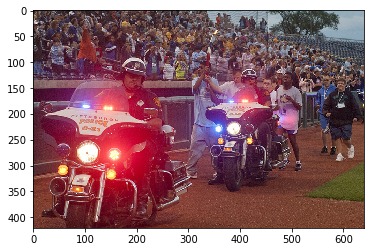

In [56]:
plt.imshow(img)

In [57]:
h, w, c = img.shape

In [58]:
mask_all = np.zeros((h, w), dtype=np.uint8)
mask_miss = np.zeros((h, w), dtype=np.uint8)

In [75]:
len(img_anns)

14

In [59]:
person = img_anns[0]

In [60]:
person.keys()

dict_keys(['area', 'segmentation', 'keypoints', 'image_id', 'bbox', 'num_keypoints', 'id', 'category_id', 'iscrowd'])

In [64]:
len(person['keypoints'])

51

In [66]:
person['category_id']

1

In [69]:
coco.getCatIds()

[1]

In [73]:
cats = coco.loadCats([1])

In [68]:
cats

[{'id': 1,
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'name': 'person',
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]],
  'supercategory': 'person'}]

In [38]:
person['bbox']

[292.99, 95.29, 72.07, 232.31]

In [40]:
mask = coco.annToMask(person)

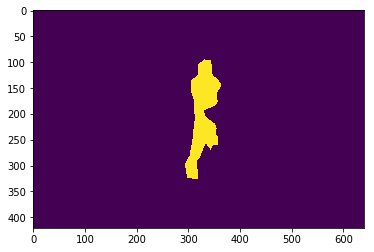

In [43]:
plt.imshow(mask)

In [45]:
person['bbox']

[292.99, 95.29, 72.07, 232.31]